### ◉research question
**Improving Newral Network by modifying hyper parameter and layers**
* I will test how the results are changing by changing a series of model patterns using keras.
* The dataset is the volumes of construction materials which is used to compose concrete, such as cement and water.
* The strength of concrete is the target value, and I will predict and research the y-hat value by regression model and mean_squared_error value.
* This dataset also includes age of concrete mix even though age is important value for strength.

### ◉the region and the domain category that this data sets are about
**USA, construction materials**


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
#### Download the concrete data
concrete_data = pd.read_csv('../input/us-concrete-data/concrete_data.csv')
print(concrete_data.shape)
print(concrete_data.head()) # By the way, unit is 'cubic meter' and days old of concrete mix, and unit of strength is MPa.
concrete_data.describe()

(1030, 9)
   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [3]:
concrete_data.isnull().sum() # Looks very clean data.

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
df = concrete_data
cols = df.columns
X = df[cols[cols != 'Strength']]
y = df['Strength']

In [5]:
# To get reproducible results I'm setting random seed
np.random.seed(1)
tf.random.set_seed(1)
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
test_size = 0.3
def random_data_split(X, y, seed):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    return X_train, X_test, y_train, y_test

Using TensorFlow backend.


## Step 1. Without Normalization

In [6]:
# baseline model (One hidden layer 10 nodes, 50 epochs)
mse_list = []
predicted_list = {}
def create_baseline_model():
    baseline_model = Sequential()
    baseline_model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
    baseline_model.add(Dense(10, activation='relu'))
    baseline_model.add(Dense(1))
    baseline_model.compile(optimizer='adam', loss='mean_squared_error')
    return baseline_model

# collect 50 mse values.
for i in range(50):
    if (i + 1) % 10 == 0:
        print('Now {} times calculating.'.format(i + 1))
    model = create_baseline_model()
    X_train, X_test, y_train, y_test = random_data_split(X, y, i)
    model.fit(X_train, y_train, epochs=50, verbose=0)
    y_hats = model.predict(X_test)
    mse = mean_squared_error(y_test, y_hats)
    mse_list.append(mse)
    predicted_list[i] = {'y_test': y_test, 'y_hats': y_hats}

# Calculate mean and standard deviation of mse values
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)
print('Mean value of MSE:{:.2f}, Standard Deviation value of MSE:{:.2f}.'.format(mse_mean, mse_std), 'First three MSE values:', mse_list[0:3])
print('Acctual Value samples', predicted_list[0]['y_test'].values[0:3], 'Predicted Value samples', np.around(predicted_list[0]['y_hats'].flatten()[0:3], decimals=2))

Now 10 times calculating.
Now 20 times calculating.
Now 30 times calculating.
Now 40 times calculating.
Now 50 times calculating.
Mean value of MSE:144.31, Standard Deviation value of MSE:81.92. First three MSE values: [103.90567961503872, 77.99134600912409, 119.18016505633024]
Acctual Value samples [26.06 10.35 79.3 ] Predicted Value samples [25.27 10.34 58.03]


## Step 2. With Normalization

In [7]:
# In this time, I'm not doing any Normalization. So I'll Normalize continuous values (by subtracting the mean from the individual predictors and dividing by the standard deviation).
X_norm = (X - X.mean()) / X.std()
X_norm.head(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340


In [8]:
# Now I'm getting ready to examin how normalization can improve the baseline model (One hidden layer 10 nodes, 50 epochs)
mse_list_norm = []
predicted_list_norm = {}
# collect 50 mse values.
for i in range(50):
    if (i + 1) % 10 == 0:
        print('Now {} times calculating.'.format(i + 1))
    model = create_baseline_model()
    X_train, X_test, y_train, y_test = random_data_split(X_norm, y, i)
    model.fit(X_train, y_train, epochs=50, verbose=0)
    y_hats = model.predict(X_test)
    mse = mean_squared_error(y_test, y_hats)
    mse_list_norm.append(mse)
    predicted_list_norm[i] = {'y_test': y_test, 'y_hats': y_hats}

# Calculate mean and standard deviation of mse values
mse_mean_norm = np.mean(mse_list_norm)
mse_std_norm = np.std(mse_list_norm)
print('Mean value of MSE:{:.2f} and Standard Deviation value of MSE:{:.2f}.'.format(mse_mean_norm, mse_std_norm), 'First three MSE values:', mse_list_norm[0:3])
print('Acctual Value samples', predicted_list_norm[0]['y_test'].values[0:3], 'Predicted Value samples', np.around(predicted_list_norm[0]['y_hats'].flatten()[0:3], decimals=2))

Now 10 times calculating.
Now 20 times calculating.
Now 30 times calculating.
Now 40 times calculating.
Now 50 times calculating.
Mean value of MSE:149.09 and Standard Deviation value of MSE:12.31. First three MSE values: [133.81502137200485, 165.0452125912544, 153.64709713438478]
Acctual Value samples [26.06 10.35 79.3 ] Predicted Value samples [46.46 18.36 58.75]


### ■In my case, after I applied Normalization to X, I can get mean of 50 MSE list as 149 over the same model.<br>So mean of 50 MSE values doesn't become getting better as without normalization genarated 144.<br>But Standard Deviation is reducing dynamically from 81 to 12.<br>So I checked histgram of 50 MSE values. Look at following charts.

<Figure size 432x288 with 0 Axes>

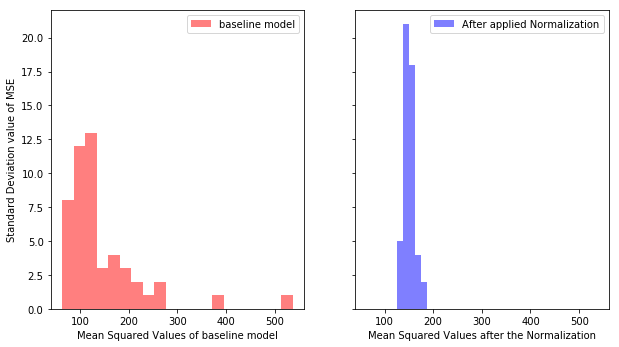

In [9]:
import matplotlib.pyplot as plt
plt.figure()
fig, ((ax1), (ax2)) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.hist(mse_list, alpha=0.5, bins=20, color='r', label='baseline model')
ax2.hist(mse_list_norm, alpha=0.5, bins=5, color='b', label='After applied Normalization')
ax1.legend()
ax2.legend()
ax1.set_xlabel('Mean Squared Values of baseline model')
ax2.set_xlabel('Mean Squared Values after the Normalization')
ax1.set_ylabel('Standard Deviation value of MSE')
fig= plt.gcf()
fig.set_size_inches(10, 5.5)
plt.show()

### In this charts, I created histgram of each mean squared values. By looking at above charts, we can recognize MSE values are no longer over the 200 after being applied Normalization.<br>By using Normalization it seems we can get narrow range of Mean Squared Error values.<br>In other words, doing Normlization to continuous values are stabilizing Mean Squared Values.<br>In this time, I'm calculating MSE value 50 times, so applying Normalization is very important if I calculate only 1 MSE value. And usually we calculate MSE value only one time.
**To recap, Normalization is essential to get correct Mean Square Value.**

## Step 3. Increase Epochs

In [10]:
# Then I will increase epoch values to 100 and look at how models are improved by increasing epoch.
# Now I'm getting ready to examin how increasing epochs can improve the normalized model (One hidden layer 10 nodes, 100 epochs)
epochs = 100
mse_list_double_epoch = []
predicted_list_double_epoch = {}
# collect 50 mse values.
for i in range(50):
    if (i + 1) % 10 == 0:
        print('Now {} times calculating.'.format(i + 1))
    model = create_baseline_model()
    X_train, X_test, y_train, y_test = random_data_split(X_norm, y, i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    y_hats = model.predict(X_test)
    mse = mean_squared_error(y_test, y_hats)
    mse_list_double_epoch.append(mse)
    predicted_list_double_epoch[i] = {'y_test': y_test, 'y_hats': y_hats}

# Calculate mean and standard deviation of mse values
mse_mean_double_epoch = np.mean(mse_list_double_epoch)
mse_std_double_epoch = np.std(mse_list_double_epoch)
print('Mean value of MSE:{:.2f} and Standard Deviation value of MSE:{:.2f}.'.format(mse_mean_double_epoch, mse_std_double_epoch), 'First three MSE values:', mse_list_double_epoch[0:3])
print('Acctual Value samples', predicted_list_double_epoch[0]['y_test'].values[0:3], 'Predicted Value samples', np.around(predicted_list_double_epoch[0]['y_hats'].flatten()[0:3], decimals=2))

Now 10 times calculating.
Now 20 times calculating.
Now 30 times calculating.
Now 40 times calculating.
Now 50 times calculating.
Mean value of MSE:117.93 and Standard Deviation value of MSE:14.41. First three MSE values: [82.32507931624104, 135.61588703590587, 116.59734099937006]
Acctual Value samples [26.06 10.35 79.3 ] Predicted Value samples [40.58 17.11 69.64]


### ■By increasing epochs to 100, the mean of 50 MSE list is improving to 117 from 149. There is no wonder though.

## Step 4. Increase NN Layers and Set Epochs Back to Step 2.

In [11]:
# Then I will increase hidden layers to three but set epochs back to 50 same as B.
# Now I'm getting ready to examin how increasing hidden layers can improve the normalized model (Three hidden layer 10 nodes, 50 epochs)
epochs = 50
mse_list_three_layers = []
predicted_list_three_layers = {}

def create_three_layer_model():
    baseline_model = Sequential()
    baseline_model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
    baseline_model.add(Dense(10, activation='relu'))
    baseline_model.add(Dense(10, activation='relu'))
    baseline_model.add(Dense(10, activation='relu'))
    baseline_model.add(Dense(1))
    baseline_model.compile(optimizer='adam', loss='mean_squared_error')
    return baseline_model

# collect 50 mse values.
for i in range(50):
    if (i + 1) % 10 == 0:
        print('Now {} times calculating.'.format(i + 1))
    model = create_three_layer_model()
    X_train, X_test, y_train, y_test = random_data_split(X_norm, y, i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    y_hats = model.predict(X_test)
    mse = mean_squared_error(y_test, y_hats)
    mse_list_three_layers.append(mse)
    predicted_list_three_layers[i] = {'y_test': y_test, 'y_hats': y_hats}

# Calculate mean and standard deviation of mse values
mse_mean_three_layers = np.mean(mse_list_three_layers)
mse_std_three_layers = np.std(mse_list_three_layers)
print('Mean value of MSE:{:.2f} and Standard Deviation value of MSE:{:.2f}.'.format(mse_mean_three_layers, mse_std_three_layers), 'First three MSE values:', mse_list_three_layers[0:3])
print('Acctual Value samples', predicted_list_three_layers[0]['y_test'].values[0:3], 'Predicted Value samples', np.around(predicted_list_three_layers[0]['y_hats'].flatten()[0:3], decimals=2))

Now 10 times calculating.
Now 20 times calculating.
Now 30 times calculating.
Now 40 times calculating.
Now 50 times calculating.
Mean value of MSE:110.20 and Standard Deviation value of MSE:23.28. First three MSE values: [77.4242822792408, 144.91703538697297, 100.49297624576963]
Acctual Value samples [26.06 10.35 79.3 ] Predicted Value samples [45.39 10.65 66.65]


### ■By increasing hidden layer to three from one, mean of 50 Mean Squared value is improving to 110 from 149. Even though epochs are same as step 2, there is a big change to MSE value to be improved.